<a href="https://colab.research.google.com/github/OutWrest/ColabKerasNNProjects/blob/master/Practice_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports TF and checks to see if it can find a GPU, (from https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=3IEVK-KFxi5Z)

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


List of colors that will only be used:  
red   
orange   
yellow  
green   
cyan  
blue  
violet   
magenta  
black  
white  
  
The NN would identify which RGB value correspons with the text color 

Input array: [R,G,B]  
Output array: [R,O,Y,G,C,B,V,M,B,W]
  
With either 1 or 0 for the output and 1-255 for input which will encoded to 0-1 for simplicity  
The sigmoid function will able to give a probability of the output depending on the input
  


In [76]:
import colorsys
import random

#Change the amount data that will be created
DATA_SET_AMOUNT = 100000

import numpy as np

def randRGB(AMOUNT):
  random_set = []
  for x in range(AMOUNT):
    random_data = [random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]
    random_set.append(random_data)
  return random_set

random_set = randRGB(DATA_SET_AMOUNT)
data_set_rgb = np.array(random_set)
print(data_set_rgb)

hsv_set = []
def RGB_to_HSV(rgb_set):
  for rgb in rgb_set:
    #print(rgb)
    #print(colorsys.rgb_to_hsv(rgb[0],rgb[1],rgb[2]))
    hsv = colorsys.rgb_to_hsv(rgb[0],rgb[1],rgb[2])
    #normalize h on 0-360 range
    hsv_set.append([round(hsv[0]*360),round(hsv[1]*100),round((hsv[2]*100)/255)])
  return hsv_set

hsv_set = RGB_to_HSV(data_set_rgb)
data_set_hsv = np.array(hsv_set)

#print(data_set_hsv)

[[ 33 229 123]
 [124 235 254]
 [  0 200 235]
 ...
 [237 155  99]
 [ 78 162  79]
 [ 44  85  27]]


Now to create a y list that knows the colors 

In [77]:
#color index:
red = 0
orange = 1
yellow = 2
green = 3
cyan = 4
blue = 5
violet = 6
magenta = 7
black = 8
white = 9

#a= colorsys.rgb_to_hsv(255,255,200)
#print([round(a[0]*360),round(a[1]*100),round((a[2]*100)/255)]) 
def colorsHSV_to_COLOR(hsv_set):
  color_set = []
  for color_hsv in hsv_set:
    _color = [0,0,0,0,0,0,0,0,0,0]
    hue = color_hsv[0]
    sat = color_hsv[1]
    val = color_hsv[2]

    #black
    if(val <= 15):
      _color[black] = 1
    #white
    elif(sat <= 15):
      _color[white] = 1

    #red
    elif(hue >= 345 or hue < 20):
      _color[red] = 1
    #orange
    elif(hue >= 20 and hue < 45):
      _color[orange] = 1
    #yellow
    elif(hue >= 45 and hue < 75):
      _color[yellow] = 1
    #green
    elif(hue >= 75 and hue < 130):
      _color[green] = 1
    #cyan
    elif(hue >= 130 and hue < 195):
      _color[cyan] = 1
    #blue
    elif(hue >= 195 and hue < 240):
      _color[blue] = 1
    #violet
    elif(hue >= 250 and hue < 285):
      _color[violet] = 1
    #magenta
    elif(hue >= 285 and hue < 345):
      _color[magenta] = 1

    color_set.append(_color)
  return color_set
color_set = colorsHSV_to_COLOR(data_set_hsv)
data_color_names = np.array(color_set)

print(data_color_names)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Change x-list to 0-1 for simplicity

In [78]:
def standardize(data_rgb):
  list_a = []
  for x in data_rgb:
    list__ = []
    for y in x:
      list__.append(y/255)
    list_a.append(list__)
  return list_a
list_a = standardize(data_set_rgb)
list_x = np.array(list_a)
print(len(list_x))
print(len(data_color_names))

100000
100000


Actual NN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(64, input_shape=(3,), activation="tanh"))
model.add(Dense(64, activation="relu"))
#model.add(Dense(64, activation="tanh"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x=list_x, y=data_color_names, epochs=5, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Using TensorFlow backend.


Epoch 1/5
100000/100000 [==============================] - 10s 102us/step - loss: 0.2488 - acc: 0.9132
Epoch 2/5
100000/100000 [==============================] - 10s 97us/step - loss: 0.0723 - acc: 0.9522
Epoch 3/5
100000/100000 [==============================] - 10s 97us/step - loss: 0.0537 - acc: 0.9554
Epoch 4/5
100000/100000 [==============================] - 10s 97us/step - loss: 0.0456 - acc: 0.9572
Epoch 5/5
100000/100000 [==============================] - 10s 96us/step - loss: 0.0404 - acc: 0.9588


your color is: 106, 158, 156
my guess is: cyan


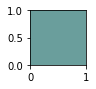

In [0]:
def decodeModel(index):
  red = 0
  orange = 1
  yellow = 2
  green = 3
  cyan = 4
  blue = 5
  violet = 6
  magenta = 7
  black = 8
  white = 9
  if(index == red):
    return "red"
  if(index == orange):
    return "orange"
  if(index == yellow):
    return "yellow"
  if(index == green):
    return "green"
  if(index == cyan):
    return "cyan"
  if(index == blue):
    return "blue"
  if(index == violet):
    return "violet"
  if(index == magenta):
    return "magenta"
  if(index == black):
    return "black"
  if(index == white):
    return "white"
  return "idk"
def encodeModel(array):
  new_array = []
  for x in array:
    new_array.append(x/255)
  return new_array

import matplotlib.pyplot as plt

def plotColor(array):
  fig = plt.figure(figsize=(1, 1))
  ax = fig.add_subplot(1,1,1)
  ax.set_facecolor((array[0],array[1],array[2]))

#creating test list
random_set_test = []
for x in range(100):
  random_data = [random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]
  random_set_test.append(random_data)

data_set_rgb_test = np.array(random_set_test)




#CHANGE THESE FOR YOUR OWN COLOR
R = 106
G = 158
B = 156
#NOTHING ELSE
print("your color is: {}, {}, {}".format(R, G, B))
Guess = np.array(encodeModel([R,G,B]))
plotColor(encodeModel([R,G,B]))
print("my guess is: " + decodeModel(np.argmax((model.predict(np.expand_dims(Guess, 0))))))

Testing NN by creating models to see what it is getting wrong

0.8062


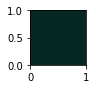

In [0]:
def randomBlack():
  return encodeModel([random.randint(0,40),random.randint(0,40),random.randint(0,40)])
def randomWhite():
  return encodeModel([random.randint(245,255),random.randint(245,255),random.randint(245,255)])

#plotColor(encodeModel())
NUM_OF_TEST = 5000
acc = 0
num = 0

wrong_array_black = []
for x in range(NUM_OF_TEST):
  _test = randomBlack()
  if(decodeModel(np.argmax((model.predict(np.expand_dims(_test, 0)))))=="black"):
    num += 1
    acc = (num)/(x+1)
  else:
    wrong_array_black.append(_test)

black_array = np.array(wrong_array_black)
plotColor(black_array[0])
print(acc)


Creating more black colors to train NN with as it is getting black color wrong sometimes

In [0]:
NUM_OF_TRAINING_BLACK_DATA = 10000

data_black = []
data_color = []
for x in range(NUM_OF_TRAINING_BLACK_DATA):
  _training = encodeModel(randomBlack())
  data_black.append(_training)
  data_color.append([0,0,0,0,0,0,0,0,1,0])

for x in list_a:
  data_black.append(x)
for y in color_set:
  data_color.append(y) 




SEED = random.randint(0,100)

print("bef")
print(data_color)
print(data_black)
data_blacka = random.Random(SEED).sample(data_black, len(data_black))
data_colora = random.Random(SEED).sample(data_color, len(data_color))
print("aft")
print(data_blacka)
print(data_colora)


black_x = np.array(data_blacka)
black_y = np.array(data_colora)
#print(black_x)
  
#list_x = np.vstack([black,black_x])

#data_color_names = np.vstack([data_color_names,black_y])
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(64, input_shape=(3,), activation="tanh"))
model.add(Dense(64, activation="relu"))
#model.add(Dense(64, activation="tanh"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])
model.fit(x=black_x, y=black_y, epochs=5, verbose=1)


  
  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1/5
110000/110000 [==============================] - 13s 117us/step - loss: 0.1503 - acc: 0.9335
Epoch 2/5
110000/110000 [==============================] - 12s 107us/step - loss: 0.0501 - acc: 0.9571
Epoch 3/5
110000/110000 [==============================] - 12s 108us/step - loss: 0.0412 - acc: 0.9596
Epoch 4/5
110000/110000 [==============================] - 12s 107us/step - loss: 0.0388 - acc: 0.9601
Epoch 5/5
110000/110000 [==============================] - 12s 107us/step - loss: 0.0371 - acc: 0.9611


In [0]:
x=[[1,2],[2,3],[4,5]]
y=[4,5,6]
print(random.Random(4).sample(x, len(x)))
print(random.Random(5).sample(y, len(y)))

[[1, 2], [2, 3], [4, 5]]
[6, 5, 4]


Training NN with more black color seems to have worked, creating an array with all the colors that the NN gets wrong using the starting list that we had.

In [79]:
colors = []
for clr in color_set:
  colors.append(clr)
  
colors_y = np.array(colors)
print(list_a[0], colors_y[0])
x = 0
num = 0
wrong_rgb = []
wrong_colors = []
for rgb in list_a:
  
  if(np.argmax(model.predict(np.expand_dims(rgb, 0)))) == np.argmax(colors_y[x]):
    num+=1
    #print(num)
  else:
    wrong_rgb.append(rgb)
    wrong_colors.append(colors_y[x])
  x+=1

acc = num/x 
print(acc)


  

[0.12941176470588237, 0.8980392156862745, 0.4823529411764706] [0 0 0 0 1 0 0 0 0 0]
0.12747


looking at the wrong colors

In [74]:
red = 0
orange = 1
yellow = 2
green = 3
cyan = 4
blue = 5
violet = 6
magenta = 7
black = 8
white = 9

wrong_color_amount= [0,0,0,0,0,0,0,0,0,0]
x = 0
for color in wrong_colors:
  colorARG = np.argmax(color)
  
  if(colorARG==red):
    wrong_color_amount[colorARG]+=1
  elif(colorARG==orange):
    wrong_color_amount[colorARG]+=1
  elif(colorARG==yellow):
    wrong_color_amount[colorARG]+=1
  elif(colorARG==green):
    wrong_color_amount[colorARG]+=1
  elif(colorARG==cyan):
    wrong_color_amount[colorARG]+=1
  elif(colorARG==blue):
    wrong_color_amount[colorARG]+=1
  elif(colorARG==violet):
    wrong_color_amount[colorARG]+=1
  elif(colorARG==magenta):
    wrong_color_amount[colorARG]+=1
  elif(colorARG==black):
    wrong_color_amount[colorARG]+=1
  elif(colorARG==white):
    wrong_color_amount[colorARG]+=1
  x+=1
  
print(wrong_color_amount)
print("I'm getting "+decodeModel(np.argmax(wrong_color_amount)) + " wrong")

[10987, 6603, 8009, 12004, 14853, 11480, 8551, 12159, 207, 2383]
I'm getting cyan wrong


Checking dataset to see how much of each color is being used to train (seeing if it is geting a baised training input)

In [0]:
colors = [0,0,0,0,0,0,0,0,0,0]
for color in color_set:
  colorARG = np.argmax(color)
  
  if(colorARG==red):
    colors[colorARG]+=1
  elif(colorARG==orange):
    colors[colorARG]+=1
  elif(colorARG==yellow):
    colors[colorARG]+=1
  elif(colorARG==green):
    colors[colorARG]+=1
  elif(colorARG==cyan):
    colors[colorARG]+=1
  elif(colorARG==blue):
    colors[colorARG]+=1
  elif(colorARG==violet):
    colors[colorARG]+=1
  elif(colorARG==magenta):
    colors[colorARG]+=1
  elif(colorARG==black):
    colors[colorARG]+=1
  elif(colorARG==white):
    colors[colorARG]+=1
    
print(colors)

[12090, 6603, 8037, 14867, 17757, 12214, 9505, 16199, 343, 2385]


Create new data for a balanced dataset

In [0]:
def hsv_to_rgb(hsv_set):
  rgb_set = []
  for hsv in hsv_set:
    h = hsv[0]
    s = hsv[1]
    v = hsv[2]
    rgb_set.append(colorsys.hsv_to_rgb(h,s,v))
  return rgb_set

def rgbN_to_hsv(rgb_set):
  hsv_set = []
  for rgb in rgb_set:
    r = rgb[0]
    g = rgb[1]
    b = rgb[2]
    hsv_set.append(colorsys.rgb_to_hsv(r,g,b))
  return hsv_set

#black
#val <= 15):
def Rd_Black(AMOUNT):
  black_list = []
  
  for x in range(AMOUNT):
    black_list.append([random.randint(0,360),random.randint(0,100),random.randint(0,15)])
  
  return black_list

#white
#sat <= 15
def Rd_White(AMOUNT):
  white_list = []
  
  for x in range(AMOUNT):
    white_list.append([random.randint(0,360),random.randint(0,15),random.randint(15,255)])
  
  return white_list

#red
#hue >= 345 or hue < 20):
def Rd_Red(AMOUNT):
  red_list = []
  
  for x in range(AMOUNT):
    a = random.randint(0,1)
    if(a==0):
      red_list.append([random.randint(0,19),random.randint(15,100),random.randint(15,255)])
    else:
      red_list.append([random.randint(345,360),random.randint(15,100),random.randint(15,255)])
  
  return red_list

#orange
#hue >= 20 and hue < 45):
def Rd_Orange(AMOUNT):
  orange_list = []
  
  for x in range(AMOUNT):
    orange_list.append([random.randint(20,44),random.randint(15,100),random.randint(15,255)])
  
  return orange_list

#yellow
#hue >= 45 and hue < 75):
def Rd_Yellow(AMOUNT):
  yellow_list = []
  
  for x in range(AMOUNT):
    yellow_list.append([random.randint(45,74),random.randint(15,100),random.randint(15,255)])
  
  return yellow_list

#green
#hue >= 75 and hue < 130):
def Rd_Green(AMOUNT):
  green_list = []
  
  for x in range(AMOUNT):
    green_list.append([random.randint(75,129),random.randint(15,100),random.randint(15,255)])
  
  return green_list

#cyan
#hue >= 130 and hue < 195):
def Rd_Cyan(AMOUNT):
  cyan_list = []
  
  for x in range(AMOUNT):
    cyan_list.append([random.randint(130,194),random.randint(15,100),random.randint(15,255)])
  
  return cyan_list

#blue
#hue >= 195 and hue < 250):
def Rd_Blue(AMOUNT):
  blue_list = []
  
  for x in range(AMOUNT):
    blue_list.append([random.randint(195,239),random.randint(15,100),random.randint(15,255)])
  
  return blue_list

#violet
#hue >= 250 and hue < 285):
def Rd_Violet(AMOUNT):
  violet_list = []
  
  for x in range(AMOUNT):
    violet_list.append([random.randint(240,284),random.randint(15,100),random.randint(15,255)])
  
  return violet_list

#magenta
#hue >= 285 and hue < 345):
def Rd_Magenta(AMOUNT):
  magenta_list = []
  
  for x in range(AMOUNT):
    magenta_list.append([random.randint(285,345),random.randint(15,100),random.randint(15,255)])
  
  return magenta_list

def createUBRandomList(AMOUNT):
  UB_Random_list = []
  for black in Rd_Black(AMOUNT):
    UB_Random_list.append(black)
  for white in Rd_White(AMOUNT):
    UB_Random_list.append(white)
  for red in Rd_Red(AMOUNT):
    UB_Random_list.append(red)
  for orange in Rd_Orange(AMOUNT):
    UB_Random_list.append(orange)
  for yellow in Rd_Yellow(AMOUNT):
    UB_Random_list.append(yellow)
  for green in Rd_Green(AMOUNT):
    UB_Random_list.append(green)
  for cyan in Rd_Cyan(AMOUNT):
    UB_Random_list.append(cyan)
  for blue in Rd_Blue(AMOUNT):
    UB_Random_list.append(blue)
  for violet in Rd_Violet(AMOUNT):
    UB_Random_list.append(violet)
  for magenta in Rd_Magenta(AMOUNT):
    UB_Random_list.append(magenta)
  return UB_Random_list

def Stardardize_HSV(hsv_colors):
  hsv_ST_colors = []
  for hsv in hsv_colors:
    h = hsv[0]
    s = hsv[1]
    v = hsv[2]
    _hsv = [h/360, s/100, (v/255)]
    hsv_ST_colors.append(_hsv)
  return hsv_ST_colors
 

In [70]:
hsv_colors = createUBRandomList(10000)
#print(np.array(hsv_colors))

#standardize data:
ST_data = Stardardize_HSV(hsv_colors)
ST_rgb_data = hsv_to_rgb(ST_data)

#print(np.array(ST_rgb_data))
color_data_ = colorsHSV_to_COLOR(hsv_colors)
clr_data = np.array(hsv_colors)

print(color_data_[0], "color")
#print(hsv_colors[1], "hsv")



SEED = random.randint(0,100)

ST_data_R = random.Random(SEED).sample(ST_data, len(ST_data))
ST_rgb_data_R = random.Random(SEED).sample(ST_rgb_data, len(ST_rgb_data))
color_data_R = random.Random(SEED).sample(color_data_, len(color_data_))



XRGB = np.array(ST_data_R)
XHSV = np.array(ST_rgb_data_R)

Y = np.array(color_data_R)

print(Y)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0] color
[[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]]


Train NN with HSV set and color

In [71]:


from keras.models import Sequential
from keras.layers import Dense, Activation
modelRGB = Sequential()
modelRGB.add(Dense(64, input_shape=(3,), activation="tanh"))
modelRGB.add(Dense(64, activation="relu"))
modelRGB.add(Dense(10, activation="softmax"))
modelRGB.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])
modelRGB.fit(x=XRGB, y=Y, epochs=5, verbose=1)

modelHSV = Sequential()
modelHSV.add(Dense(64, input_shape=(3,), activation="tanh"))
modelHSV.add(Dense(64, activation="relu"))
modelHSV.add(Dense(10, activation="softmax"))
modelHSV.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=["accuracy"])
modelHSV.fit(x=XHSV, y=Y, epochs=5, verbose=1)

Epoch 1/5
100000/100000 [==============================] - 11s 114us/step - loss: 0.4149 - acc: 0.8421
Epoch 2/5
100000/100000 [==============================] - 11s 108us/step - loss: 0.1265 - acc: 0.9326
Epoch 3/5
100000/100000 [==============================] - 11s 107us/step - loss: 0.0997 - acc: 0.9394
Epoch 4/5
100000/100000 [==============================] - 11s 106us/step - loss: 0.0872 - acc: 0.9427
Epoch 5/5
100000/100000 [==============================] - 11s 107us/step - loss: 0.0804 - acc: 0.9450
Epoch 1/5
100000/100000 [==============================] - 12s 121us/step - loss: 0.2745 - acc: 0.8992
Epoch 2/5
100000/100000 [==============================] - 11s 111us/step - loss: 0.1036 - acc: 0.9418
Epoch 3/5
100000/100000 [==============================] - 11s 107us/step - loss: 0.0839 - acc: 0.9464
Epoch 4/5
100000/100000 [==============================] - 11s 109us/step - loss: 0.0758 - acc: 0.9485
Epoch 5/5
100000/100000 [==============================] - 11s 113us/step

In [82]:
print(ST_rgb_data_R[0], color_data_R[0])
x = 0
num = 0
wrong_rgb = []
wrong_colors = []

for rgb in ST_rgb_data_R:
  
  if(np.argmax(modelRGB.predict(np.expand_dims(rgb, 0)))) == np.argmax(color_data_R[x]):
    num+=1
    #print(num)
  else:
    wrong_rgb.append(rgb)
    wrong_colors.append(color_data_R[x])
  x+=1

acc = num/x 
print(acc)
#np.expand_dims(rgb, 0)

(0.7098039215686275, 0.09937254901960786, 0.09937254901960786) [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.17985


In [83]:
print(wrong_rgb[0])
print(wrong_colors[0])

(0.7098039215686275, 0.09937254901960786, 0.09937254901960786)
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
